In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import tensorflow as tf

# Load MNIST dataset

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Display the first 9 images from the dataset

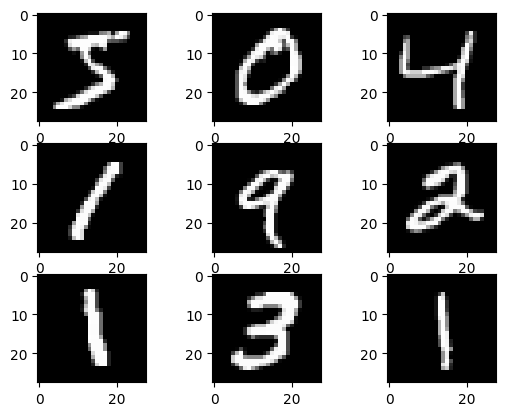

In [24]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

# Preprocessing

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
x_test.shape

(10000, 28, 28)

# Flatten the images (from 28x28 to a single vector of size 784)

In [29]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [30]:
# Convert image pixel values to float32 and scale to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [31]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [32]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 784)
y_train shape: (60000, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)


# Question 1

# A.)Compute and display the number of classes.

In [33]:
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 2


# B.)Compute and display the dimensions of each image.

In [34]:
image_dim = x_train.shape[1]
print("Dimensions of each image:", image_dim)

Dimensions of each image: 784


# c.)Display one image from each class.

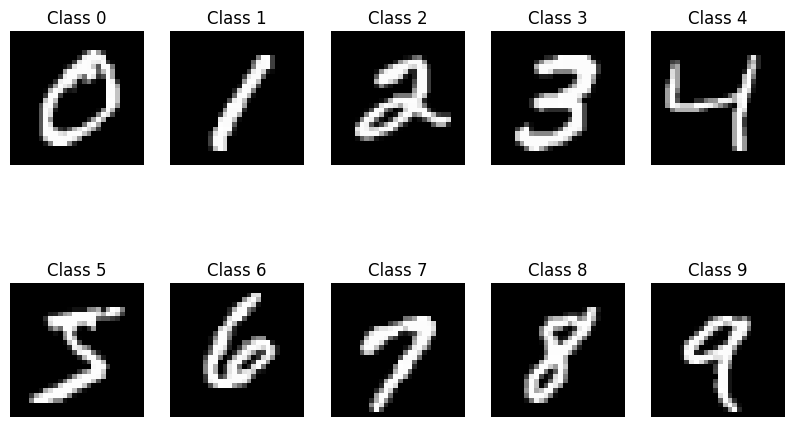

In [35]:
unique_classes = np.unique(np.argmax(y_train, axis=1))  # Get the unique class labels
plt.figure(figsize=(10, 6))
for class_idx in unique_classes:
    class_images = x_train[y_train[:, class_idx] == 1]
    plt.subplot(2, 5, class_idx + 1)
    plt.imshow(class_images[0].reshape(28, 28), cmap='gray')
    plt.title("Class " + str(class_idx))
    plt.axis('off')
plt.show()


# Q2) Performing experiments on Fully Connected Neural Networks (FCNN):

# A and B

In [45]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [73]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [74]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [75]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3861 - accuracy: 0.8913 - val_loss: 0.1761 - val_accuracy: 0.9505
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1506 - accuracy: 0.9565 - val_loss: 0.1319 - val_accuracy: 0.9617
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1051 - accuracy: 0.9691 - val_loss: 0.1141 - val_accuracy: 0.9665
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9764 - val_loss: 0.1042 - val_accuracy: 0.9704
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0625 - accuracy: 0.9816 - val_loss: 0.0950 - val_accuracy: 0.9713
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0504 - accuracy: 0.9849 - val_loss: 0.0933 - val_accuracy: 0.9725
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0412 - accuracy: 0.9876 - val_loss: 0.0892 - val_accuracy: 0.9750
Epoch 

In [55]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1481 - accuracy: 0.9797
Test accuracy: 0.9797000288963318


# c. Plot the performance curves.

In [60]:
from sklearn.metrics import roc_curve, auc

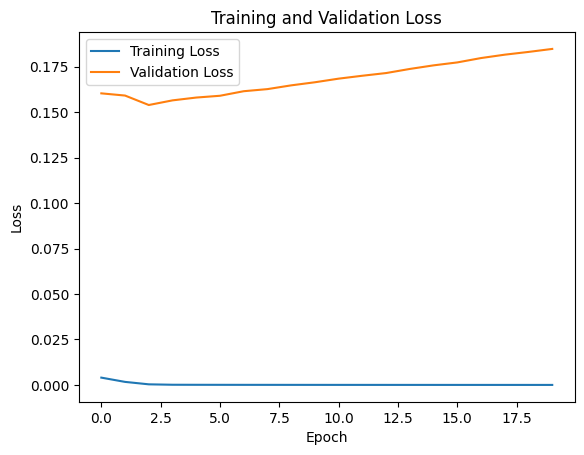

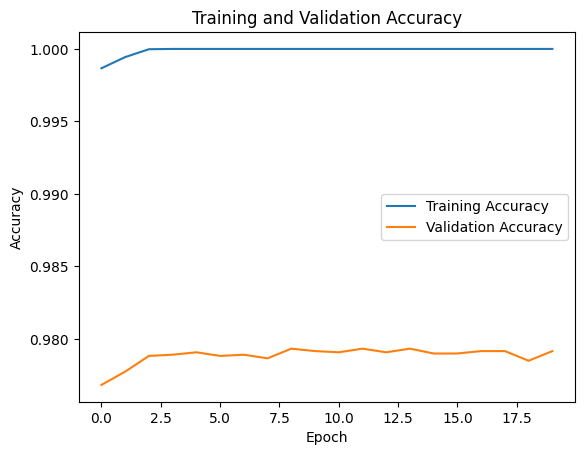

In [56]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Roc curve

In [62]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 692us/step


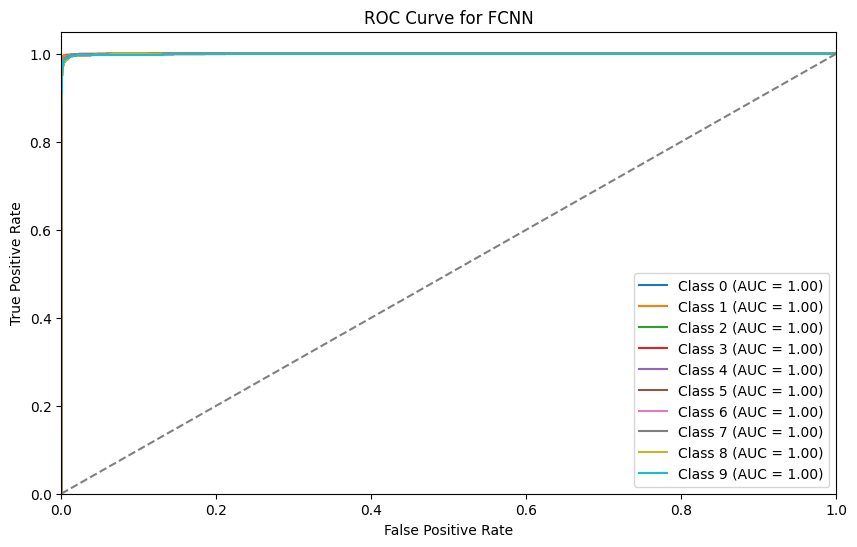

In [63]:
plt.figure(figsize=(10, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for FCNN')
plt.legend(loc='lower right')
plt.show()

# Q3) Performing experiments on a Convolutional Neural Networks (CNNs):

In [58]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

In [76]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

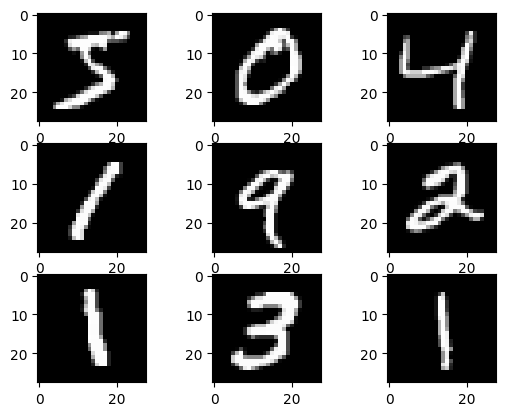

In [77]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

# Preprocessing

In [78]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# c. Train and test the networks (choose the best epoch size so that there is no overfitting)

# Design CNN-1 which contains:

In [79]:
cnn1_model = Sequential()
cnn1_model.add(Conv2D(32, (5, 5), strides=(1, 1), padding='valid', input_shape=(28, 28, 1)))
cnn1_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn1_model.add(Flatten())
cnn1_model.add(Dense(100))
cnn1_model.add(Activation('relu'))
cnn1_model.add(Dense(10, activation='softmax'))

In [80]:
cnn1_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
cnn1_history = cnn1_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
375/375 [==============================] - 4s 5ms/step - loss: 0.2650 - accuracy: 0.9246 - val_loss: 0.1131 - val_accuracy: 0.9693
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0840 - accuracy: 0.9758 - val_loss: 0.0860 - val_accuracy: 0.9736
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0504 - accuracy: 0.9847 - val_loss: 0.0630 - val_accuracy: 0.9821
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0613 - val_accuracy: 0.9824
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0593 - val_accuracy: 0.9812
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 0.0591 - val_accuracy: 0.9837
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0626 - val_accuracy: 0.9820
Epoch 

#  Design CNN-2 which contains:

In [82]:
cnn2_model = Sequential()
cnn2_model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='valid', input_shape=(28, 28, 1), activation='relu'))
cnn2_model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu'))
cnn2_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn2_model.add(Flatten())
cnn2_model.add(Dense(100))
cnn2_model.add(Activation('relu'))
cnn2_model.add(Dense(10, activation='softmax'))

In [83]:
cnn2_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
cnn2_history = cnn2_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.2140 - accuracy: 0.9381 - val_loss: 0.0670 - val_accuracy: 0.9802
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0557 - accuracy: 0.9827 - val_loss: 0.0620 - val_accuracy: 0.9818
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0346 - accuracy: 0.9894 - val_loss: 0.0518 - val_accuracy: 0.9858
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0508 - val_accuracy: 0.9855
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.0495 - val_accuracy: 0.9872
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0118 - accuracy: 0.9966 - val_loss: 0.0473 - val_accuracy: 0.9871
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.0489 - val_accuracy: 0.9885
Epoch 

# d.Plot the performance curves for CNN-1 and CNN-2.

## CNN-1

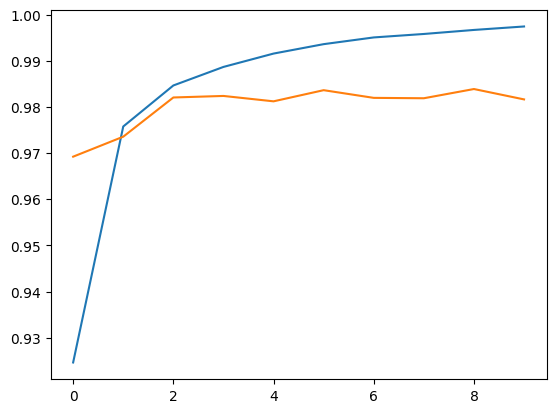

In [85]:
plt.plot(cnn1_history.history['accuracy'], label='CNN-1 Training Accuracy')
plt.plot(cnn1_history.history['val_accuracy'], label='CNN-1 Validation Accuracy')

## CNN_2

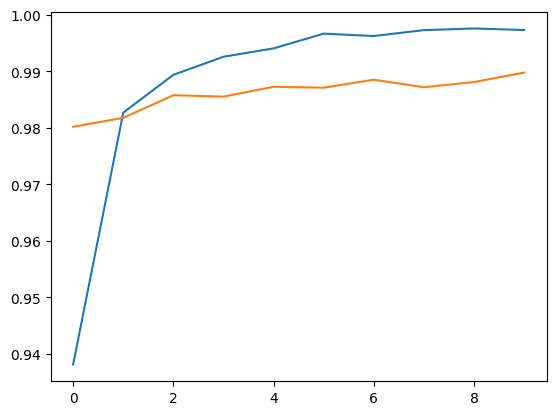

In [86]:
plt.plot(cnn2_history.history['accuracy'], label='CNN-2 Training Accuracy')
plt.plot(cnn2_history.history['val_accuracy'], label='CNN-2 Validation Accuracy')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


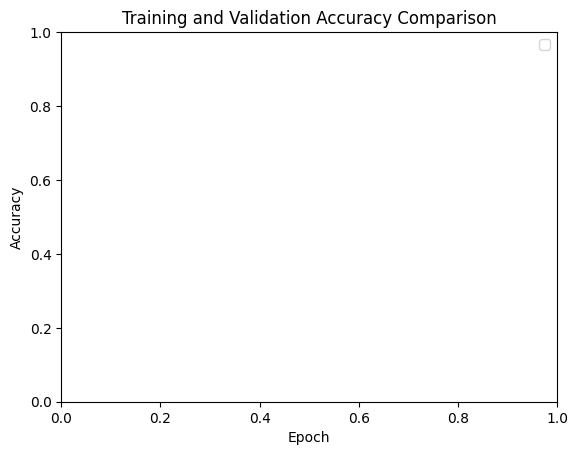

In [87]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Comparison')
plt.show()

# e. Compare the performances of CNN-1 and CNN-2.

In [88]:
cnn1_test_loss, cnn1_test_accuracy = cnn1_model.evaluate(x_test, y_test)
cnn2_test_loss, cnn2_test_accuracy = cnn2_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0435 - accuracy: 0.9882


In [89]:
print("CNN-1 Test Accuracy:", cnn1_test_accuracy)
print("CNN-2 Test Accuracy:", cnn2_test_accuracy)

CNN-1 Test Accuracy: 0.9836000204086304
CNN-2 Test Accuracy: 0.9882000088691711
